# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [67]:
# 哪個區間的Target Rate最高 ? （以10000作一個區間的話)
bins = np.linspace(0, 1000000, 101)
app_train['Income_grp'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins)
T_mean_df = app_train.groupby('Income_grp')['TARGET'].mean().reset_index()
print(app_train.groupby('Income_grp')['TARGET'].count())
T_mean_df[T_mean_df['TARGET']==T_mean_df['TARGET'].max()]

Income_grp
(0.0, 10000.0]               0
(10000.0, 20000.0]           0
(20000.0, 30000.0]         141
(30000.0, 40000.0]         822
(40000.0, 50000.0]        3554
(50000.0, 60000.0]        4035
(60000.0, 70000.0]       12881
(70000.0, 80000.0]        5930
(80000.0, 90000.0]       30559
(90000.0, 100000.0]       5776
(100000.0, 110000.0]      5725
(110000.0, 120000.0]     33914
(120000.0, 130000.0]      8936
(130000.0, 140000.0]     38102
(140000.0, 150000.0]      4914
(150000.0, 160000.0]     27838
(160000.0, 170000.0]      4025
(170000.0, 180000.0]     28432
(180000.0, 190000.0]      2372
(190000.0, 200000.0]      1640
(200000.0, 210000.0]     17143
(210000.0, 220000.0]      2524
(220000.0, 230000.0]     21423
(230000.0, 240000.0]      1229
(240000.0, 250000.0]      5818
(250000.0, 260000.0]      1072
(260000.0, 270000.0]     11545
(270000.0, 280000.0]       405
(280000.0, 290000.0]       437
(290000.0, 300000.0]      3580
                         ...  
(700000.0, 710000.0]        

,Income_grp,TARGET
87,"(870000.0, 880000.0]",0.25


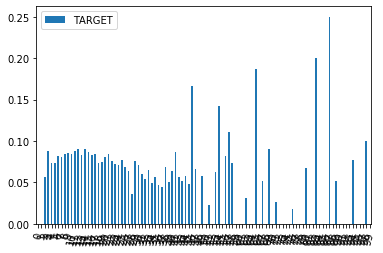

In [65]:
T_mean_df.plot(kind='bar', rot=75)

In [68]:
# 哪個區間的Target Rate最高 ? （以20000作一個區間的話)
bins = np.linspace(0, 1000000, 51)
app_train['Income_grp'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins)
T_mean_df = app_train.groupby('Income_grp')['TARGET'].mean().reset_index()
print(app_train.groupby('Income_grp')['TARGET'].count())
T_mean_df[T_mean_df['TARGET']==T_mean_df['TARGET'].max()]

Income_grp
(0.0, 20000.0]               0
(20000.0, 40000.0]         963
(40000.0, 60000.0]        7589
(60000.0, 80000.0]       18811
(80000.0, 100000.0]      36335
(100000.0, 120000.0]     39639
(120000.0, 140000.0]     47038
(140000.0, 160000.0]     32752
(160000.0, 180000.0]     32457
(180000.0, 200000.0]      4012
(200000.0, 220000.0]     19667
(220000.0, 240000.0]     22652
(240000.0, 260000.0]      6890
(260000.0, 280000.0]     11950
(280000.0, 300000.0]      4017
(300000.0, 320000.0]      6598
(320000.0, 340000.0]      2112
(340000.0, 360000.0]      4527
(360000.0, 380000.0]       243
(380000.0, 400000.0]      1196
(400000.0, 420000.0]      1786
(420000.0, 440000.0]       571
(440000.0, 460000.0]      2588
(460000.0, 480000.0]       114
(480000.0, 500000.0]       302
(500000.0, 520000.0]        52
(520000.0, 540000.0]       776
(540000.0, 560000.0]        15
(560000.0, 580000.0]        70
(580000.0, 600000.0]       182
(600000.0, 620000.0]        35
(620000.0, 640000.0]       1

,Income_grp,TARGET
32,"(640000.0, 660000.0]",0.166667


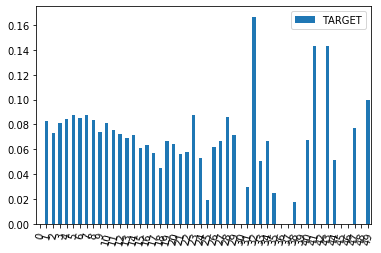

In [63]:
T_mean_df.plot(kind='bar', rot=75)

In [ ]:
# 用的分組區間不同，就會影響結果的判讀 : 要設定區間的話要有先決知識
# 為什麼87萬不再是最高？因為區間拉大，從圖上可看出，他旁邊的 860000, 880000幾乎沒有值，而稀釋了這個區間
# 除此之外，用count檢查後發現是找到的max區間，其count都很少，所以光是改變區間範圍就有很截然不同的結果

In [75]:
sub_df = app_train[app_train['AMT_INCOME_TOTAL'] < 500000]

In [76]:
bins = np.linspace(0, 500000, 51)
sub_df['Income_grp'] = pd.cut(sub_df['AMT_INCOME_TOTAL'], bins)
T_mean_df = sub_df.groupby('Income_grp')['TARGET'].mean().reset_index()
print(sub_df.groupby('Income_grp')['TARGET'].count())
T_mean_df[T_mean_df['TARGET']==T_mean_df['TARGET'].max()]

Income_grp
(0.0, 10000.0]              0
(10000.0, 20000.0]          0
(20000.0, 30000.0]        141
(30000.0, 40000.0]        822
(40000.0, 50000.0]       3554
(50000.0, 60000.0]       4035
(60000.0, 70000.0]      12881
(70000.0, 80000.0]       5930
(80000.0, 90000.0]      30559
(90000.0, 100000.0]      5776
(100000.0, 110000.0]     5725
(110000.0, 120000.0]    33914
(120000.0, 130000.0]     8936
(130000.0, 140000.0]    38102
(140000.0, 150000.0]     4914
(150000.0, 160000.0]    27838
(160000.0, 170000.0]     4025
(170000.0, 180000.0]    28432
(180000.0, 190000.0]     2372
(190000.0, 200000.0]     1640
(200000.0, 210000.0]    17143
(210000.0, 220000.0]     2524
(220000.0, 230000.0]    21423
(230000.0, 240000.0]     1229
(240000.0, 250000.0]     5818
(250000.0, 260000.0]     1072
(260000.0, 270000.0]    11545
(270000.0, 280000.0]      405
(280000.0, 290000.0]      437
(290000.0, 300000.0]     3580
(300000.0, 310000.0]      553
(310000.0, 320000.0]     6045
(320000.0, 330000.0]      240

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Income_grp,TARGET
46,"(460000.0, 470000.0]",0.166667


In [ ]:
#### bins = np.linspace(0, 500000, 26)
sub_df['Income_grp'] = pd.cut(sub_df['AMT_INCOME_TOTAL'], bins)
T_mean_df = sub_df.groupby('Income_grp')['TARGET'].mean().reset_index()
print(sub_df.groupby('Income_grp')['TARGET'].count())
T_mean_df[T_mean_df['TARGET']==T_mean_df['TARGET'].max()]

In [ ]:
# 如果把區間改在50萬以下, 不管是用2萬或是1萬的window都有近似的結果 (46-47;46-48)
# 因此，在處理之前要很小心離散值對結果造成的影響